# 이미지

### 디지털 이미지

수많은 점들로 이루어져있다. 색상을 가지는 점 하나를 화소(pixel, picture element)라고 한다. 각 화소는 RGB(Red, Green, Blue) 세 개의 단일 색의 강도를 조절해서 표현한다.

이는 눈의 망막에 있는 시세포가 인간의 경우 대부분 세 가지로 이루어져 있기 때문이다.

아래 그림은 각 종류의 시세포가 반응하는 색상 영역을 나타낸다. 특이하게도 일부 인간들과 일부 새들은 시세포의 종류가 하나씩 더 있어서, 색을 조금 더 세밀하게 인식하거나 일부 자외선 영역을 감지할 수 있다.

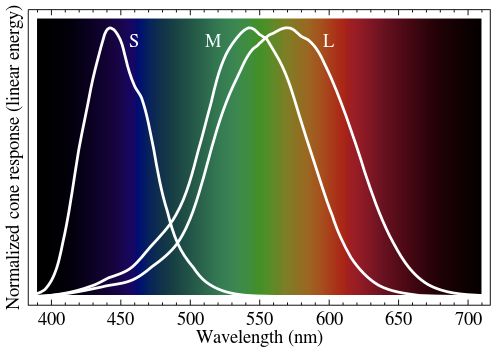

# 이미지 저장

레스터 또는 비트맵

각 점 하나하나의 색상 값을 저장하는 방식

점마다 각 색상별로 8비트를 사용하여 0~255 사이의 값(2^8=256)으로 해당 핵의 감도를 표시

벡터

상대적인 점과 선의 위치를 방적식으로 기록

확대 및 축소에 따라 디지털 화면의 각 화소에 어떻게 표현될 지를 재계산하기에 깨짐이 없다.

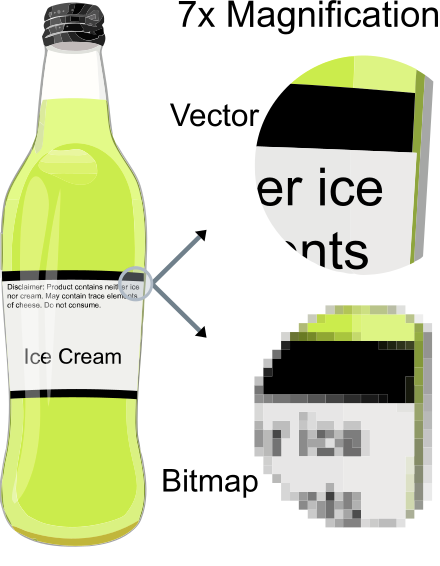

색상 정보를 그대로 저장하기란, 생각보다 많은 용량을 차지한다. 따라서, 사진 저장에 흔히 쓰이는 JPEG 이미지 형식의 경우 근처에 있는 화소들을 묶어, 비슷한 색들을 몽뚱그리는 방식으로 이미지를 압축.

이러한 방식에는 색상 정보의 손실이 있기에, 저장할 때 압축률을 높이거나, 여러번 다시 저장하는 등 재압축이 일어나게 될 경우, 흔히 디지털 풍화라고 불리는 색상이 지저분해지는 현상을 볼 수 있다.

# 이미지 처리

옛날 옛적에 파이썬에서의 이미지 처리를 위해 PIL(Python Image Library)이라는 라이브러리가 있었습니다. 하지만 이 라이브러리는 2011년 마지막 커밋을 이후로 개발이 중단되었습니다. 대신 이 정신을 Pillow가 이어받아 현재까지도 지속적으로 이어져 내려오고 있습니다. 오늘 학습의 주인공은 Pillow가 아니라 OpenCV입니다. 그러나 간단한 이미지 작업에 Pillow는 Numpy와 결합하여 간편하게 사용할 수 있는 도구입니다. 오늘 우리는 먼저 간단히 Pillow 사용법을 살펴보고 오늘 실습 데이터인 CIFAR-100 데이터를 전처리하는 작업을 진행해 보려고 합니다.

PIL을 이용해 바로 이미지 하나를 직접 생성해 보겠습니다. 명심할 점은 결국 이미지는 배열 형태의 데이터라는 점

ex) 가로 세로 각 32픽셀에 RGB 세 가지 색상 채널이 있다면, Numpy로 [32, 32, 3]

또한, 데이터 타입을 unit8, 즉 각 값이 부호가 없는(unsighed) 8비트 정수(integer)가 되어 0~255(2의 8승 = 256) 사이의 값을 나타내도록 해야 한다.

In [6]:
import numpy as np
from PIL import Image #만들어진 배열을 함수를 통해 이미지를 객채로 변환한 뒤 화면에 표시


In [14]:
# 검정색

data = np.zeros([32, 32, 3], dtype = np.uint8)
image = Image.fromarray(data, 'RGB')
image.show()

In [15]:
# 빨간색

data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image.show()

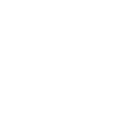

In [18]:
# 흰색

data = np.zeros([128, 128, 3], dtype=np.uint8)
data[:, :] = [255, 255,255]
image = Image.fromarray(data, 'RGB')
image

In [22]:
# 연습용 이미지를 열어 width와 height를 출력하고, .save()를 이용하여 jpg 파일 포맷으로 저장

from PIL import Image
import os

# 연습용 파일 경로
image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice.png'

# 이미지 열기
img = Image.open(image_path)
img

# width와 height 출력
print(img.width)
print(img. height)

# JPG 파일 형식으로 저장해보기

new_image_path = os.getenv('HOME') + '/Desktop/'
img = img.convert('RGB')
img.save(new_image_path)

FileNotFoundError: ignored

In [23]:
# resize()를 이용하여 이미지 크기를 100 * 200으로 변경

resized_image = img.resize((100, 200))

resized_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice_resized.png'
resized_image.save(resized_image_path)
resized_image

NameError: ignored

In [24]:
# .crop()을 이용하여 눈 부분만 잘라내어 저장하자

box = (300, 100, 600, 400)
region = img.crop(box)

cropped_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice_cropped.png'
region.save(cropped_image_path)
region

NameError: ignored

### CIFAR-100 데이터를 받아 개별 이미지 파일로 추출하기

In [25]:
import os
import pickle
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))

FileNotFoundError: ignored

In [ ]:
train.key() # 키들이 뭐가 있는 지 확인

특이사항으로는 각 키들이 문자열(str)이 아닌, b로 시작하는 bytes로 되어 있다는 점이다.

이에 유의하여, 일단 파일명(b'filenames')들을 한번 살펴봅시다.

In [ ]:
type(train[b'filenames']) #list인 것을 알 수 있다.

In [26]:
train[b'filenames'][0:5] # 파일 이름을 확인할 수 있다.

NameError: ignored

In [ ]:
train[b'data'][0:5] # numpy 배열이 나왔다.

In [27]:
train[b'data'][0].shape

NameError: ignored

3072라는 숫자는 빨강 초록 파랑 3채널 * 1024(=32 ^ 32)씩 각 화소에 해당한다.

그렇다면 이 Numpy 배열을 잘 reshape하면 이미지 파일 원본이 복구된다는 뜻이다. 그럼(32,32,3)으로 reshape한 후 이미지를 화면에 출력해보자

주의할 점

3072바이트의 이미지 데이터는 앞 1024바이트는 빨강(R), 그 다음 1024 녹색(G), 마지막 1024 파랑(B)으로 되어 있다. RGB 순서가 맞는 것은 다행이지만, 그렇다고 그냥 모양만 맞추어 reshape하면 안 된다. 1024를 32*32에 채우는 것을 3번 반복하는 방식의 reshape이어야 한다. 이렇게 앞선 차원부터 데이터를 채우는 방식의 reshape를 위해 np.reshape에는 order라는 인자가 있다. 이 값을 F로 주면 원하는 형태로 진행된다.

In [28]:
image_data = train[b'data'][0].reshape([32, 32, 3], order='F')   # order를 주의하세요!!
image = Image.fromarray(image_data)    # Pillow를 사용하여 Numpy 배열을 Image객체로 만들어서
image    # 화면에 띄워 봅시다!!

NameError: ignored

이미지의 X축과 Y축이 뒤집어져 나온다. 축을 바꿔주는 작업이 필요하다.

image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image

In [ ]:
# 이미지를 변형시킨 후 저장

import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32, 32, 3], order='F')
        image = Image.fromarray(data.swapaxes(0, 1))
        image.save(os.path.join(images_dir_path, filename))

# OpenCV

영상 처리에 대한 다양한 고급 기능

이미지의 내용 중 우리가 관심 있는 부분이 특정 색을 가지고 있다면, 이 정보를 통해 원하는 부분을 배경을 구분하고, 원하는 부분만 따로 떼어낼 수 있습니다. 

In [29]:
import os
import cv2 as cv
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path) # imread 파일로 부터 이미지를 읽어와 변환

# Convert BGR to HSV (400 * 300 * 3)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([100,100,100]) # 색상값 100~130, 명도 100~255사이
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors (400 * 300 (*1))
mask = cv.inRange(hsv, lower_blue, upper_blue) # 파란값은 1, 그렇지 않으면 0

# Bitwise-AND mask and original image
res = cv.bitwise_and(img, img, mask=mask) # AND 비트연산, img img를 넣어 동일한 이미지
                                          # mask를 같이 넣어줘서, 해당 영역만 따오게끔

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

error: ignored